In [6]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## to make it possible to display multiple output inside one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 50
# pd.set_option('display.float_format', lambda x: '%9.8f' % x)

# Conclusion

Various attributes are highly correlated (eg it's only snowy when it's cold, or at 7am the destination is always work)

These are natural correlations, but not redundancies so I can't really eliminate any of these features.
I could consider using PCA, but that will make it even harder to interpret the factors influencing a yes decision.

Luckily, DecisionTrees make no assumptions about the features, so multi-colinearlity is ok for randomforests.


In [20]:
nonoccupation_features = ['has_children', 'age', 'education', 'income', 'gender_Male',
                          'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
       'time', 'temperature', 'minsToCouponDest', 'direction_same', 
       'destination_No Urgent Place', 'destination_Work',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Snowy', 'weather_Sunny', 'expiration_2h',
                          'Bar_freq_unknown', 'Bar', 
                          'CoffeeHouse_freq_unknown', 'CoffeeHouse', 
                          'CarryAway_freq_unknown', 'CarryAway',
                          'RestaurantLessThan20_freq_unknown', 'RestaurantLessThan20', 
                          'Restaurant20To50_freq_unknown', 'Restaurant20To50',
                          'Y'
       ]

occupation_features = ['occupation_Arts Design Entertainment Sports & Media',
       'occupation_Building & Grounds Cleaning & Maintenance',
       'occupation_Business & Financial',
       'occupation_Community & Social Services',
       'occupation_Computer & Mathematical',
       'occupation_Construction & Extraction',
       'occupation_Education&Training&Library',
       'occupation_Farming Fishing & Forestry',
       'occupation_Food Preparation & Serving Related',
       'occupation_Healthcare Practitioners & Technical',
       'occupation_Healthcare Support',
       'occupation_Installation Maintenance & Repair', 'occupation_Legal',
       'occupation_Life Physical Social Science', 'occupation_Management',
       'occupation_Office & Administrative Support',
       'occupation_Personal Care & Service',
       'occupation_Production Occupations', 'occupation_Protective Service',
       'occupation_Retired', 'occupation_Sales & Related',
       'occupation_Student', 'occupation_Transportation & Material Moving',
       'occupation_Unemployed']

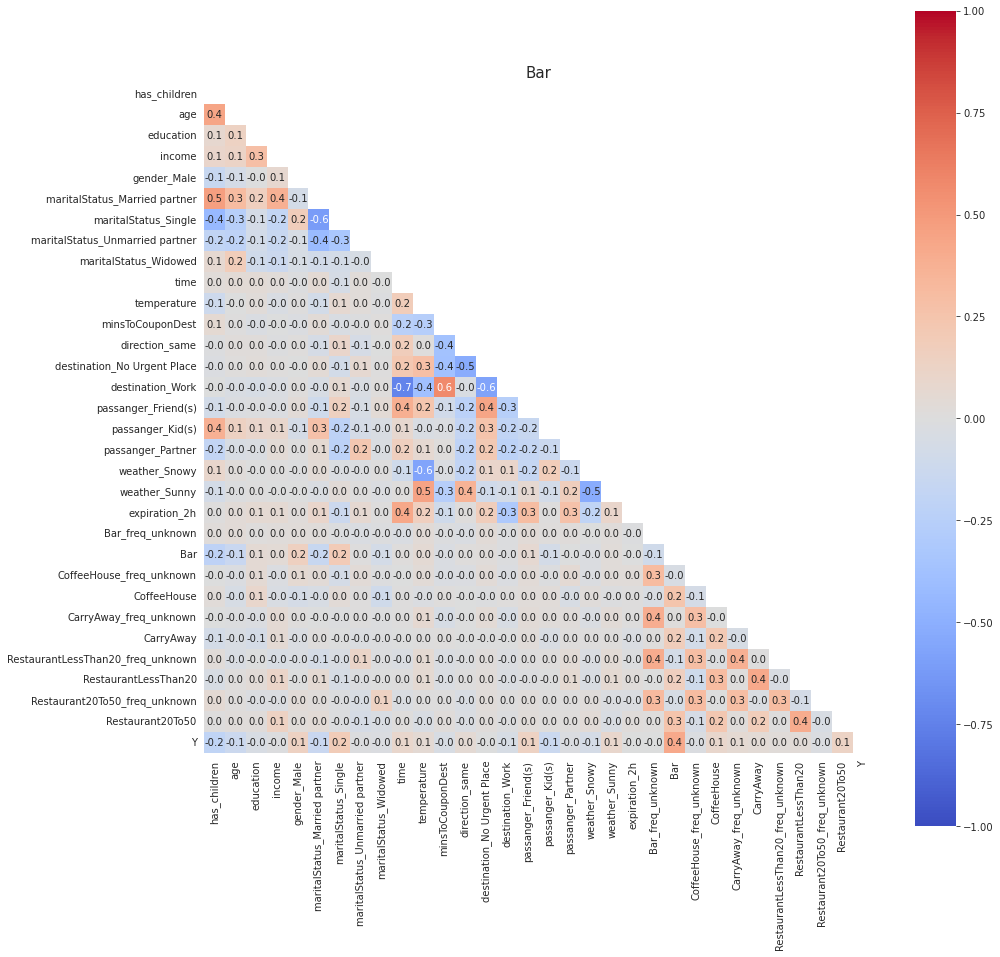

In [34]:
Bar_data = pd.read_csv('data/Bar_data_encoded.csv')

corr = Bar_data[nonoccupation_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1, vmax=1, 
                     square=True, annot=True, fmt='.1f').set_title('Bar', fontsize=15)

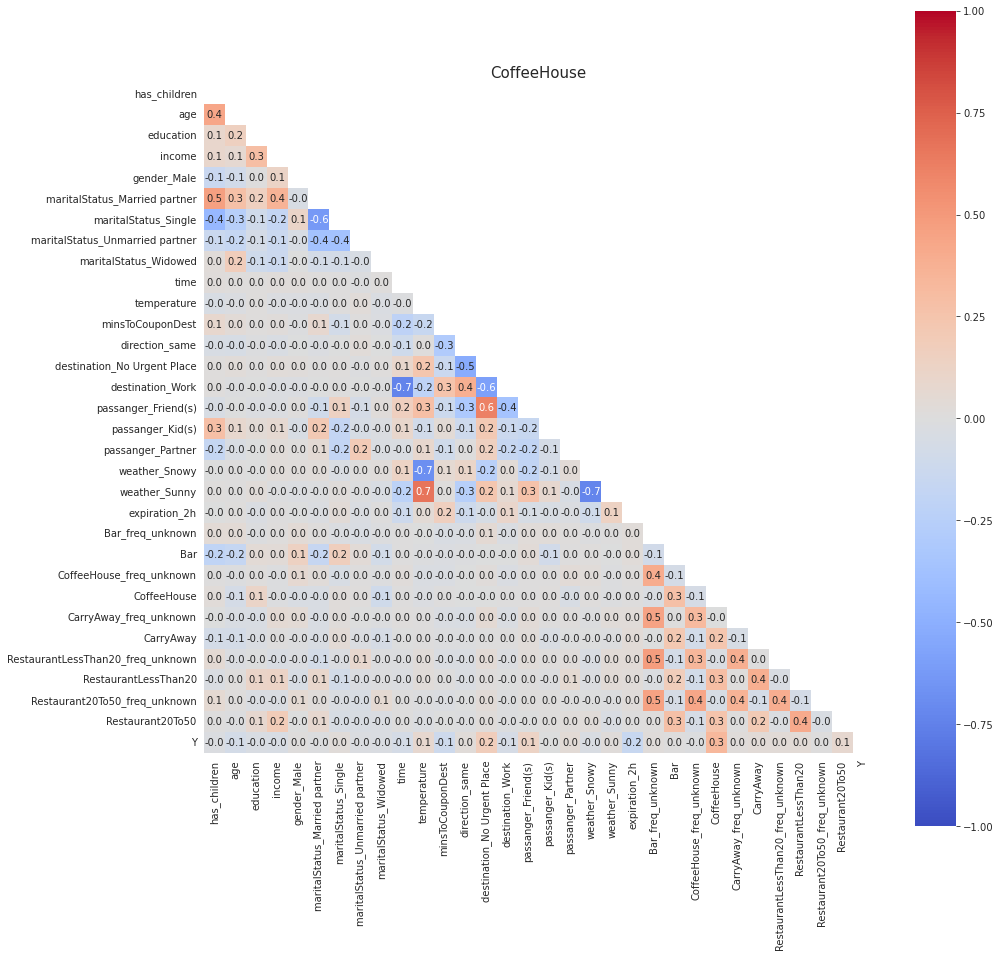

In [35]:
CoffeeHouse_data = pd.read_csv('data/CoffeeHouse_data_encoded.csv')

corr = CoffeeHouse_data[nonoccupation_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1, vmax=1, 
                     square=True, annot=True, fmt='.1f').set_title('CoffeeHouse', fontsize=15)

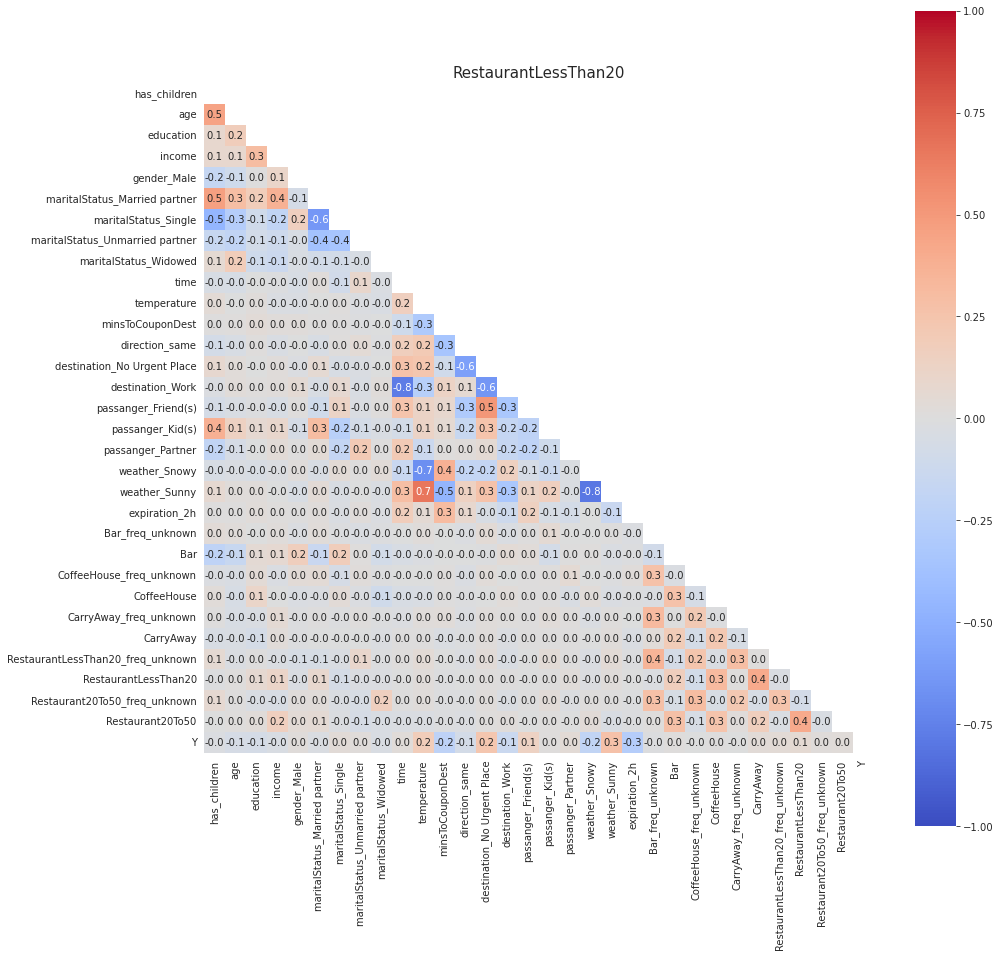

In [36]:
RestaurantLessThan20_data = pd.read_csv('data/RestaurantLessThan20_data_encoded.csv')

corr = RestaurantLessThan20_data[nonoccupation_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1, vmax=1, 
                     square=True, annot=True, fmt='.1f').set_title('RestaurantLessThan20', fontsize=15)

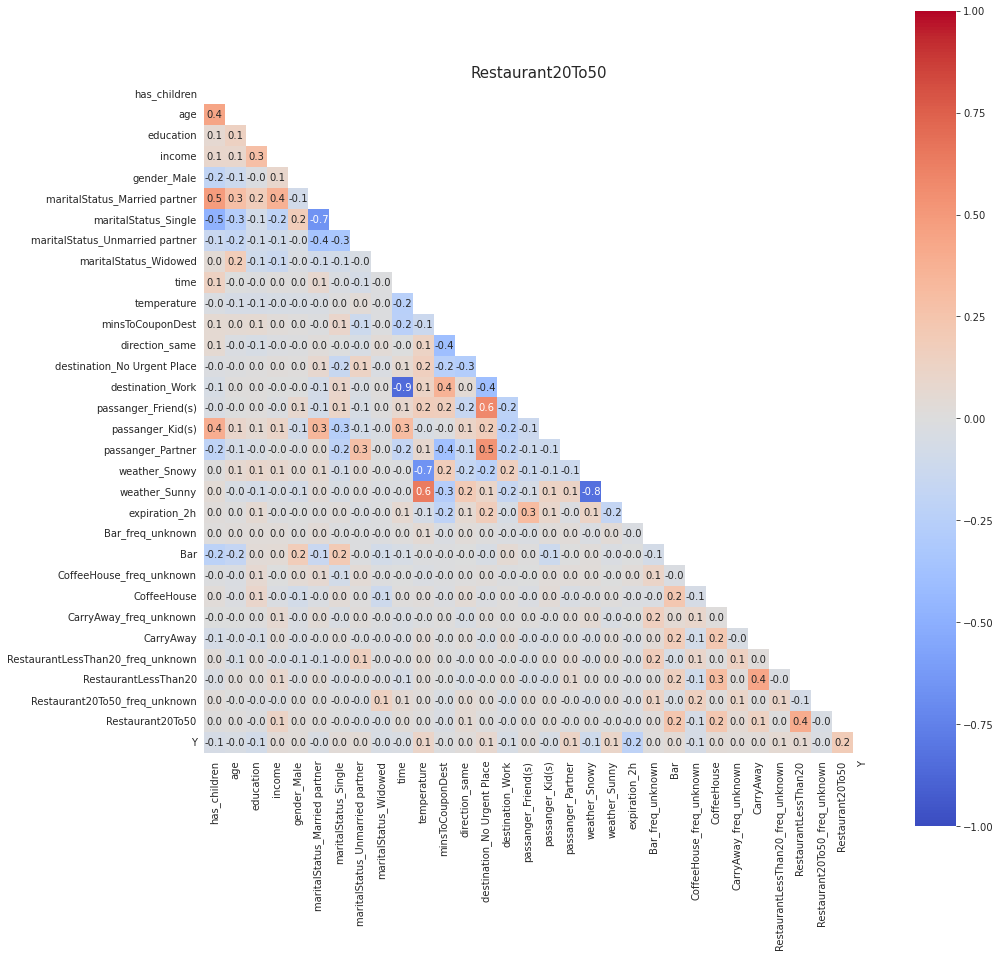

In [37]:
Restaurant20To50_data = pd.read_csv('data/Restaurant20To50_data_encoded.csv')

corr = Restaurant20To50_data[nonoccupation_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1, vmax=1, 
                     square=True, annot=True, fmt='.1f').set_title('Restaurant20To50', fontsize=15)

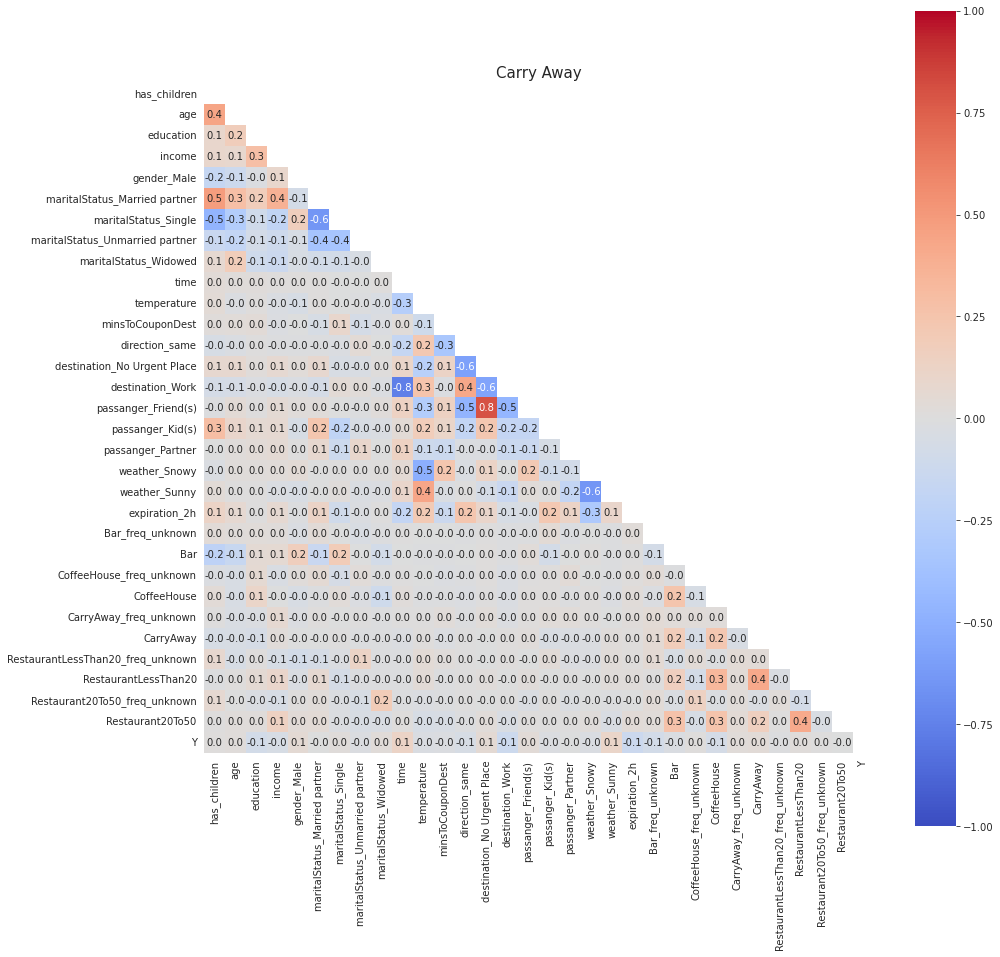

In [33]:
CarryAway_data = pd.read_csv('data/CarryAway_data_encoded.csv')

corr = CarryAway_data[nonoccupation_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1, vmax=1, 
                     square=True, annot=True, fmt='.1f').set_title('Carry Away', fontsize=15)

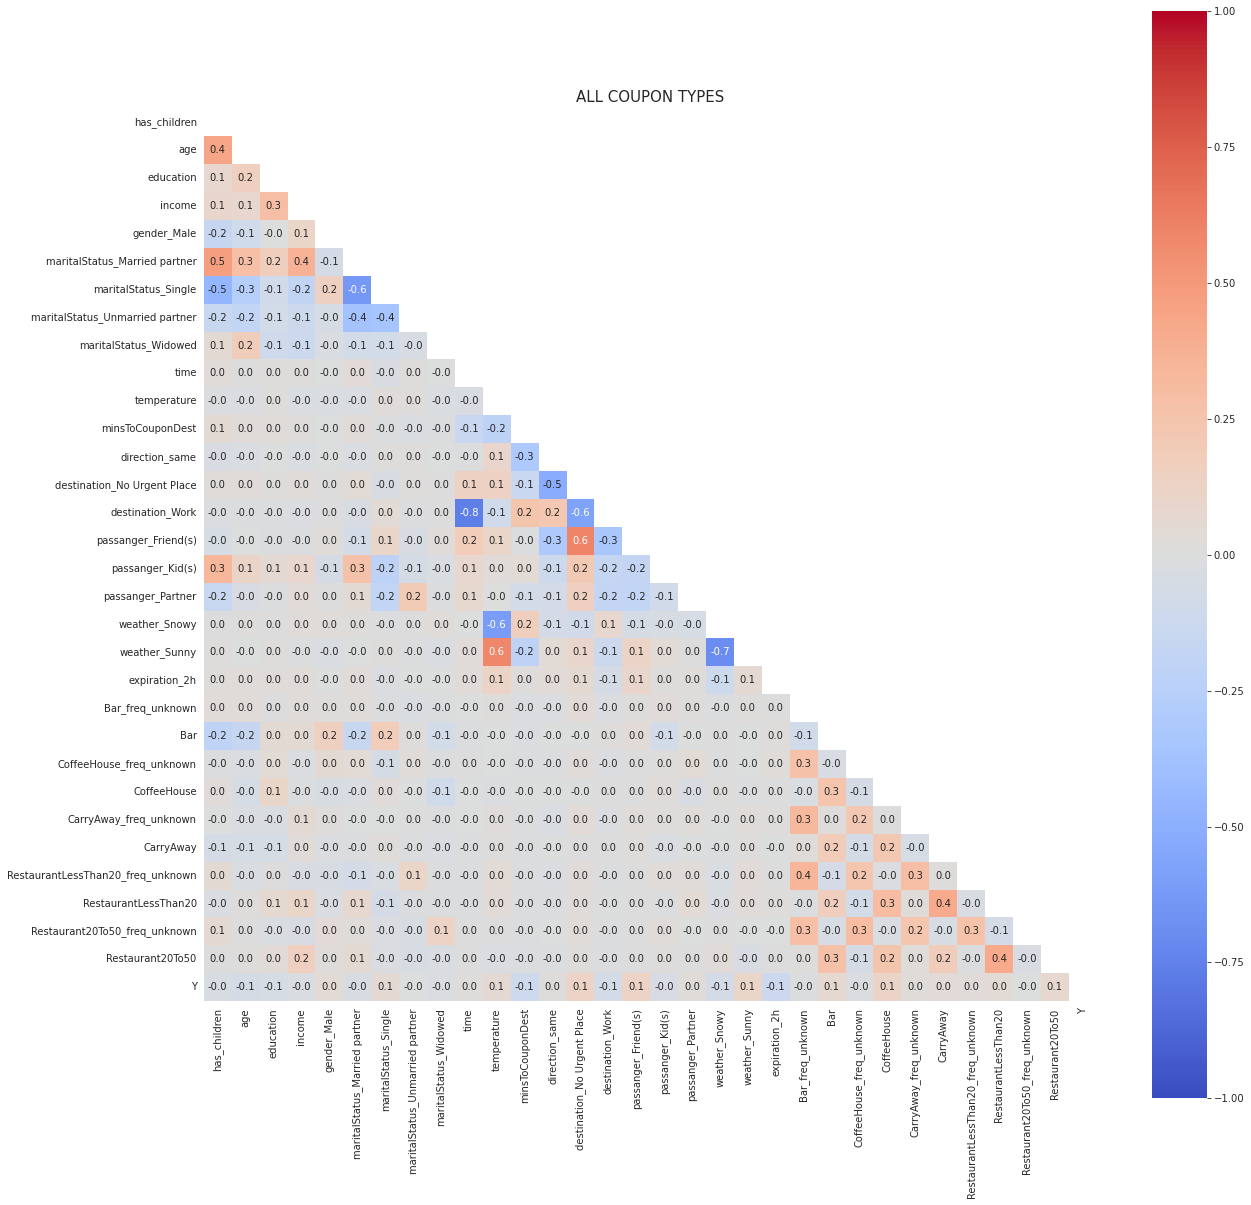

In [38]:
full_data = pd.read_csv('data/full_dataset_encoded_plus_coupon.csv')

corr = full_data[nonoccupation_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1, vmax=1, 
                     square=True, annot=True, fmt='.1f').set_title('ALL COUPON TYPES', fontsize=15)

## explore correlated values in original dataset

In [22]:
file_name = "data/in-vehicle-coupon-recommendation.csv"
raw_data = pd.read_csv(file_name)

In [23]:
raw_data[['weather', 'temperature']].value_counts()

weather  temperature
Sunny    80             6528
         55             2630
Snowy    30             1405
Rainy    55             1210
Sunny    30              911
dtype: int64

In [29]:
raw_data[['time', 'destination']].value_counts()

time  destination    
7AM   Work               3164
10AM  No Urgent Place    2275
6PM   Home               2123
2PM   No Urgent Place    2009
10PM  Home               1114
6PM   No Urgent Place    1107
10PM  No Urgent Place     892
dtype: int64

7am is always work
10am & 2pm are always no urgent place
6pm & 10pm are either home or no urgent place